# Generating Medical Imaging Reports

In [64]:
import pydicom
import dsuport as sp
from importlib import reload
reload(sp)
import matplotlib.pylab as plt
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

## Extracting Medical image from Dicom file

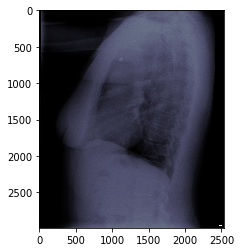

In [62]:
#Reading Dicom File
file_name = "test_files/99_IM-2476-1002.dcm"
dicom_dataset = pydicom.dcmread(file_name)

#Obtaining Image from Dicom data
dicom_dataset_img = sp.convert2image(dicom_dataset, file_name)

#Display Image for Demo Purpose
plt.imshow(dicom_dataset_img, cmap=plt.cm.bone)

## Obtain Findings from ML Model

In [63]:
#Get Impression and Findings from trained Neural Network
impression, findings, tags = sp.get_imp_findings(file_name, dicom_dataset_img)
print("Impressions: ", impression)
print("Findings: ", findings)
print("Tags: ", tags)

TypeError: get_imp_findings() takes 1 positional argument but 2 were given

## Updating DICOM files

In [58]:
#updating values of dicom data
#fin = "The lungs are clear. Heart and pulmonary XXXX appear normal. The pleural spaces are clear and mediastinal contours are normal. Nodular density overlying the anterior left 4th rib XXXX represents a healing rib fracture."
#print(fin)
#impressions from model
#imp = "1. No acute cardiopulmonary disease"
#print(imp)
#tags from model
#tags = "normal"
#Body Part Examined

'''if "normal" in tags:
    # Do not update the Dicom File
else:
    # Update the Dicom File by adding findings to Additional Patient History
    dicom_dataset.x'''

dicom_dataset.BodyPartExamined = "Chest"
print(dicom_dataset.BodyPartExamined)
pydicom.write_file(file_name,dicom_dataset)

Chest


# Generate Medical Image Report

In [61]:
#fin,imp,tags = take value from model
dcm_data = sp.dicom2dict(dicom_dataset, findings, impression, tags)
sp.generate_medical_report(file_name,dcm_data)

test_files/1030_IM-0024-1001.pdf
